# Assignment 2
```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Measure of Central Tendency: Mean     (P/N/S)
B. Measure of Central Tendency: Median   (P/N/S)
C. Measure of Central Tendency: Modus    (P/N/S)
D. Measure of Spread: Range              (P/N/S)
E. Measure of Spread: Variance           (P/N/S)
F. Measure of Spread: Standard Deviation (P/N/S)
G. Probability Distribution              (+C)
H. Confidence Intervals
I. Hypothesis Testing                    (+C)

*for each (A - I):
- Question/what data we want to look up
- Pre-processing if needed

===
Keterangan:
(P/N/S) : Pandas / NumPy / Scipy
(+C)    : +Conclusion (menarik informasi/kesimpulan)

===
(*)Untuk:
- contoh question,  ada di page/halamannya Assignment 2 "Examples of questions can be ..."
- more detail tentang dekripsi kolom pada dataset & special note tentang dataset, juga ada di halaman yang sama
```

In [1]:
# Import Package yang diperlukan
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Buat dataframe utama
df_ds = pd.read_csv('nyc-rolling-sales.csv')

## Preprocessing Data : Data Cleansing

In [3]:
# Cek Missing value
df_ds.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Pada pengecekan menggunakan .info missing value tidak ditemukan (tidak ada), tapi pada kolom sale price terdapat tanda "-" yang menunjukkan data kosong yang harus diganti atau replace dengan nan.

In [5]:
df_ds.shape

(84548, 22)

In [6]:
# Mengganti tanda "-" dengan nan
df_ds = df_ds.replace(' -  ', np.nan)
df_ds = df_ds.replace('', np.nan)

In [7]:
df_ds.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
# Pengecekan lebih lanjut menggunakan .isnull
df_ds.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [9]:
# Handling Missing Value menggunakan median
df_ds['LAND SQUARE FEET'].fillna(df_ds['LAND SQUARE FEET'].median(),inplace=True)
df_ds['GROSS SQUARE FEET'].fillna(df_ds['GROSS SQUARE FEET'].median(),inplace=True)
df_ds['SALE PRICE'].fillna(df_ds['SALE PRICE'].median(),inplace=True)

In [10]:
df_ds.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [11]:
# Identify Rows for duplicate data
dle = df_ds.duplicated()
dle

0        False
1        False
2        False
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Length: 84548, dtype: bool

In [12]:
print(dle.any())

False


Tidak terdapat duplikasi data

In [13]:
# Merubah variabel bertipe object kedalam category
# Agar dapat dipoperasikan
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [14]:
df_ds['BUILDING CLASS AT PRESENT'] = df_ds['BUILDING CLASS AT PRESENT'].astype('category')
df_ds['NEIGHBORHOOD'] = df_ds['NEIGHBORHOOD'].astype('category')
df_ds['BUILDING CLASS CATEGORY'] = df_ds['BUILDING CLASS CATEGORY'].astype('category')
df_ds['TAX CLASS AT PRESENT'] = df_ds['TAX CLASS AT PRESENT'].astype('category')
df_ds['ADDRESS'] = df_ds['ADDRESS'].astype('category')
df_ds['BUILDING CLASS AT TIME OF SALE'] = df_ds['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [15]:
df_ds['BUILDING CLASS AT PRESENT_new'] = pd.core.arrays.categorical.Categorical(df_ds['BUILDING CLASS AT PRESENT']).codes
df_ds['NEIGHBORHOOD_new'] = pd.core.arrays.categorical.Categorical(df_ds['NEIGHBORHOOD']).codes
df_ds['BUILDING CLASS CATEGORY_new'] = pd.core.arrays.categorical.Categorical(df_ds['BUILDING CLASS CATEGORY']).codes
df_ds['TAX CLASS AT PRESENT_new'] =pd.core.arrays.categorical.Categorical(df_ds['TAX CLASS AT PRESENT']).codes
df_ds['ADDRESS_new'] = pd.core.arrays.categorical.Categorical(df_ds['ADDRESS']).codes
df_ds['BUILDING CLASS AT TIME OF SALE_new'] = pd.core.arrays.categorical.Categorical(df_ds['BUILDING CLASS AT TIME OF SALE']).codes

In [16]:
df_ds.shape

(84548, 28)

In [17]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Unnamed: 0                          84548 non-null  int64   
 1   BOROUGH                             84548 non-null  int64   
 2   NEIGHBORHOOD                        84548 non-null  category
 3   BUILDING CLASS CATEGORY             84548 non-null  category
 4   TAX CLASS AT PRESENT                84548 non-null  category
 5   BLOCK                               84548 non-null  int64   
 6   LOT                                 84548 non-null  int64   
 7   EASE-MENT                           84548 non-null  object  
 8   BUILDING CLASS AT PRESENT           84548 non-null  category
 9   ADDRESS                             84548 non-null  category
 10  APARTMENT NUMBER                    84548 non-null  object  
 11  ZIP CODE                    

In [18]:
# Menghapus kolom yang tidak diperlukan
# EASE-MENT, APARTMENT NUMBER, Unnamed: 0, dan ZIP CODE
df_ds.drop(['EASE-MENT','APARTMENT NUMBER','Unnamed: 0','ZIP CODE'],axis=1, inplace=True)

In [19]:
df_ds.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,2,C2,6625000,2017-07-19 00:00:00,16,1,6,6,14889,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,2,C7,530000.0,2016-12-14 00:00:00,21,1,6,5,28592,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,2,C7,530000.0,2016-12-09 00:00:00,21,1,6,5,22192,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,2,C4,3936272,2016-09-23 00:00:00,18,1,6,7,15090,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,2,C2,8000000,2016-11-17 00:00:00,16,1,6,6,35431,15


# Descriptive Statistics

---
## A. Measure of Central Tendency : Mean

**Question**  // *Deskripsi dari informasi apa yang ingin dicari/dihitung di step 2*

In [20]:
# Question: Mencari mean dari masing masing kolom pada Dataset

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum melakukan Proses Statistik*

In [21]:
# 1. pre-processing if needed

In [22]:
# 2. Implement/try-to-use statistical method here ..
mean = df_ds.mean()
mean

C:\Users\ASUS\AppData\Local\Temp/ipykernel_33284/4170577978.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_ds.mean()


BOROUGH                                   2.998758
BLOCK                                  4237.218976
LOT                                     376.224015
RESIDENTIAL UNITS                         2.025264
COMMERCIAL UNITS                          0.193559
TOTAL UNITS                               2.249184
YEAR BUILT                             1789.322976
TAX CLASS AT TIME OF SALE                 1.657485
BUILDING CLASS AT PRESENT_new            47.573284
NEIGHBORHOOD_new                        127.367708
BUILDING CLASS CATEGORY_new               7.455043
TAX CLASS AT PRESENT_new                  3.526305
ADDRESS_new                           33608.317062
BUILDING CLASS AT TIME OF SALE_new       47.657106
dtype: float64

In [23]:
df_ds['TOTAL UNITS'].mean()

2.249183895538629

**Implement statistical method** // *Mengimplementaskan Mean dari kolom/data spesifik menggunakan Pandas, NumPy, atau Scipy*

---
## B. Measure of Central Tendency : Median

In [24]:
# Question: Mencari median dari masing masing kolom pada Dataset

In [25]:
# 1. pre-processing if needed

In [26]:
# 2. Implement/try-to-use statistical method here ..
median = df_ds.median()
median

C:\Users\ASUS\AppData\Local\Temp/ipykernel_33284/1991831921.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df_ds.median()


BOROUGH                                    3.0
BLOCK                                   3311.0
LOT                                       50.0
RESIDENTIAL UNITS                          1.0
COMMERCIAL UNITS                           0.0
TOTAL UNITS                                1.0
LAND SQUARE FEET                        2325.0
GROSS SQUARE FEET                       1680.0
YEAR BUILT                              1940.0
TAX CLASS AT TIME OF SALE                  2.0
SALE PRICE                            530000.0
BUILDING CLASS AT PRESENT_new             20.0
NEIGHBORHOOD_new                         122.0
BUILDING CLASS CATEGORY_new                6.0
TAX CLASS AT PRESENT_new                   5.0
ADDRESS_new                            33806.5
BUILDING CLASS AT TIME OF SALE_new        19.0
dtype: float64

---
## C. Measure of Central Tendency: Modus 

In [27]:
# Question: Mencari modus dari masing masing kolom pada Dataset

In [28]:
# 1. pre-processing if needed

In [29]:
# 2. Implement/try-to-use statistical method here ..
mod = df_ds.mode()
mod

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,1,0,...,1,R4,530000.0,2017-06-29 00:00:00,29,87,0,1,8984,120


In [30]:
df_ds['TOTAL UNITS'].mode()

0    1
dtype: int64

## D. Measure of Spread: Range

In [31]:
# Question: Mencari range (quantle, max, and min) dari masing masing kolom pada Dataset

In [32]:
# 1. pre-processing if needed

In [33]:
# 2. Implement/try-to-use statistical method here ..
# Quantile
df_ds.quantile(q=0.25)

BOROUGH                                   2.00
BLOCK                                  1322.75
LOT                                      22.00
RESIDENTIAL UNITS                         0.00
COMMERCIAL UNITS                          0.00
TOTAL UNITS                               1.00
YEAR BUILT                             1920.00
TAX CLASS AT TIME OF SALE                 1.00
BUILDING CLASS AT PRESENT_new            10.00
NEIGHBORHOOD_new                         68.00
BUILDING CLASS CATEGORY_new               1.00
TAX CLASS AT PRESENT_new                  1.00
ADDRESS_new                           16840.75
BUILDING CLASS AT TIME OF SALE_new        9.00
Name: 0.25, dtype: float64

In [34]:
# Quantile
df_ds.quantile(q=0.25)

BOROUGH                                   2.00
BLOCK                                  1322.75
LOT                                      22.00
RESIDENTIAL UNITS                         0.00
COMMERCIAL UNITS                          0.00
TOTAL UNITS                               1.00
YEAR BUILT                             1920.00
TAX CLASS AT TIME OF SALE                 1.00
BUILDING CLASS AT PRESENT_new            10.00
NEIGHBORHOOD_new                         68.00
BUILDING CLASS CATEGORY_new               1.00
TAX CLASS AT PRESENT_new                  1.00
ADDRESS_new                           16840.75
BUILDING CLASS AT TIME OF SALE_new        9.00
Name: 0.25, dtype: float64

In [35]:
df_ds.quantile(q=0.5)

BOROUGH                                   3.0
BLOCK                                  3311.0
LOT                                      50.0
RESIDENTIAL UNITS                         1.0
COMMERCIAL UNITS                          0.0
TOTAL UNITS                               1.0
YEAR BUILT                             1940.0
TAX CLASS AT TIME OF SALE                 2.0
BUILDING CLASS AT PRESENT_new            20.0
NEIGHBORHOOD_new                        122.0
BUILDING CLASS CATEGORY_new               6.0
TAX CLASS AT PRESENT_new                  5.0
ADDRESS_new                           33806.5
BUILDING CLASS AT TIME OF SALE_new       19.0
Name: 0.5, dtype: float64

In [36]:
df_ds.quantile(q=0.75)

BOROUGH                                   4.00
BLOCK                                  6281.00
LOT                                    1001.00
RESIDENTIAL UNITS                         2.00
COMMERCIAL UNITS                          0.00
TOTAL UNITS                               2.00
YEAR BUILT                             1965.00
TAX CLASS AT TIME OF SALE                 2.00
BUILDING CLASS AT PRESENT_new           120.00
NEIGHBORHOOD_new                        195.00
BUILDING CLASS CATEGORY_new              13.00
TAX CLASS AT PRESENT_new                  5.00
ADDRESS_new                           49950.25
BUILDING CLASS AT TIME OF SALE_new      119.00
Name: 0.75, dtype: float64

In [37]:
# Nilai maksimum
Mx = df_ds.max()
Mx

C:\Users\ASUS\AppData\Local\Temp/ipykernel_33284/1652076454.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mx = df_ds.max()


BOROUGH                                                 5
BLOCK                                               16322
LOT                                                  9106
RESIDENTIAL UNITS                                    1844
COMMERCIAL UNITS                                     2261
TOTAL UNITS                                          2261
YEAR BUILT                                           2017
TAX CLASS AT TIME OF SALE                               4
SALE DATE                             2017-08-31 00:00:00
BUILDING CLASS AT PRESENT_new                         166
NEIGHBORHOOD_new                                      253
BUILDING CLASS CATEGORY_new                            46
TAX CLASS AT PRESENT_new                               10
ADDRESS_new                                         67562
BUILDING CLASS AT TIME OF SALE_new                    165
dtype: object

In [38]:
# Nilai minimum
Mn = df_ds.min()
Mn

C:\Users\ASUS\AppData\Local\Temp/ipykernel_33284/2085442656.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mn = df_ds.min()


BOROUGH                                                 1
BLOCK                                                   1
LOT                                                     1
RESIDENTIAL UNITS                                       0
COMMERCIAL UNITS                                        0
TOTAL UNITS                                             0
YEAR BUILT                                              0
TAX CLASS AT TIME OF SALE                               1
SALE DATE                             2016-09-01 00:00:00
BUILDING CLASS AT PRESENT_new                           0
NEIGHBORHOOD_new                                        0
BUILDING CLASS CATEGORY_new                             0
TAX CLASS AT PRESENT_new                                0
ADDRESS_new                                             0
BUILDING CLASS AT TIME OF SALE_new                      0
dtype: object

In [92]:
# Preparation new dataset menghilangkan kolom sale date
df_new = df_ds.copy()
df_new.drop(['SALE DATE'],axis=1, inplace=True)

In [93]:
df_new.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,1900,2,C2,6625000,16,1,6,6,14889,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,1900,2,C7,530000.0,21,1,6,5,28592,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,1900,2,C7,530000.0,21,1,6,5,22192,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,1913,2,C4,3936272,18,1,6,7,15090,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,1900,2,C2,8000000,16,1,6,6,35431,15


In [94]:
# Mencari nilai maximum pada dataset baru
Mx_new = df_new.max()
Mx_new

C:\Users\ASUS\AppData\Local\Temp/ipykernel_33284/2252892444.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mx_new = df_new.max()


BOROUGH                                   5
BLOCK                                 16322
LOT                                    9106
RESIDENTIAL UNITS                      1844
COMMERCIAL UNITS                       2261
TOTAL UNITS                            2261
YEAR BUILT                             2017
TAX CLASS AT TIME OF SALE                 4
BUILDING CLASS AT PRESENT_new           166
NEIGHBORHOOD_new                        253
BUILDING CLASS CATEGORY_new              46
TAX CLASS AT PRESENT_new                 10
ADDRESS_new                           67562
BUILDING CLASS AT TIME OF SALE_new      165
dtype: int64

In [95]:
# Mencari nilai minimum pada dataset baru
Mn_new = df_new.min()
Mn_new

C:\Users\ASUS\AppData\Local\Temp/ipykernel_33284/2492960045.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mn_new = df_new.min()


BOROUGH                               1
BLOCK                                 1
LOT                                   1
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             1
BUILDING CLASS AT PRESENT_new         0
NEIGHBORHOOD_new                      0
BUILDING CLASS CATEGORY_new           0
TAX CLASS AT PRESENT_new              0
ADDRESS_new                           0
BUILDING CLASS AT TIME OF SALE_new    0
dtype: int64

In [96]:
# Range dari new dataset
Range = Mx_new- Mn_new
Range

BOROUGH                                   4
BLOCK                                 16321
LOT                                    9105
RESIDENTIAL UNITS                      1844
COMMERCIAL UNITS                       2261
TOTAL UNITS                            2261
YEAR BUILT                             2017
TAX CLASS AT TIME OF SALE                 3
BUILDING CLASS AT PRESENT_new           166
NEIGHBORHOOD_new                        253
BUILDING CLASS CATEGORY_new              46
TAX CLASS AT PRESENT_new                 10
ADDRESS_new                           67562
BUILDING CLASS AT TIME OF SALE_new      165
dtype: int64

In [40]:
# Inter Quartile Range (Selisih persentil ke 75 dan 25)
IQRange = df_ds.quantile(q=0.75)-df_ds.quantile(q=0.25)
IQRange

BOROUGH                                   2.00
BLOCK                                  4958.25
LOT                                     979.00
RESIDENTIAL UNITS                         2.00
COMMERCIAL UNITS                          0.00
TOTAL UNITS                               1.00
YEAR BUILT                               45.00
TAX CLASS AT TIME OF SALE                 1.00
BUILDING CLASS AT PRESENT_new           110.00
NEIGHBORHOOD_new                        127.00
BUILDING CLASS CATEGORY_new              12.00
TAX CLASS AT PRESENT_new                  4.00
ADDRESS_new                           33109.50
BUILDING CLASS AT TIME OF SALE_new      110.00
dtype: float64

## E. Measure of Spread: Variance

In [ ]:
# Question: Menghitung variance dari Sale Price

In [ ]:
# 1. pre-processing if needed

In [41]:
# 2. Implement/try-to-use statistical method here ..
varian = df_ds.var()
varian

C:\Users\ASUS\AppData\Local\Temp/ipykernel_33284/917395578.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  varian = df_ds.var()


BOROUGH                               1.663558e+00
BLOCK                                 1.273250e+07
LOT                                   4.331441e+05
RESIDENTIAL UNITS                     2.795931e+02
COMMERCIAL UNITS                      7.591956e+01
TOTAL UNITS                           3.599590e+02
YEAR BUILT                            2.887396e+05
TAX CLASS AT TIME OF SALE             6.713200e-01
BUILDING CLASS AT PRESENT_new         2.626808e+03
NEIGHBORHOOD_new                      5.622463e+03
BUILDING CLASS CATEGORY_new           8.141408e+01
TAX CLASS AT PRESENT_new              7.660266e+00
ADDRESS_new                           3.748610e+08
BUILDING CLASS AT TIME OF SALE_new    2.656259e+03
dtype: float64

## F. Measure of Spread: Standard Deviation

In [ ]:
# Question: Menghitung Standard deviation dari Total Units

In [ ]:
# 1. pre-processing if needed

In [ ]:
# 2. Implement/try-to-use statistical method here ..
statistics.stdev(df_ds['TOTAL UNITS'])

## Using .describe to know overall value descriptive statistics

In [ ]:
# Question: Mengetahui nilai statistik deskriptif secara keseluruhan

In [ ]:
# 1. pre-processing if needed

In [42]:
# 2. Implement/try-to-use statistical method here ..
df_ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BOROUGH,84548.0,NaN,NaN,NaN,2.998758,1.28979,1.0,2.0,3.0,4.0,5.0
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,84548,11,1,38633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,84548.0,NaN,NaN,NaN,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.0,16322.0
LOT,84548.0,NaN,NaN,NaN,376.224015,658.136814,1.0,22.0,50.0,1001.0,9106.0
BUILDING CLASS AT PRESENT,84548,167,D4,12663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,84548,67563,131-05 40TH ROAD,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RESIDENTIAL UNITS,84548.0,NaN,NaN,NaN,2.025264,16.721037,0.0,0.0,1.0,2.0,1844.0
COMMERCIAL UNITS,84548.0,NaN,NaN,NaN,0.193559,8.713183,0.0,0.0,0.0,0.0,2261.0


# Inferential Statistics

## G. Probability Distribution

In [ ]:
# Question: Menghitung probability distribution dari beberapa kolom pada dataset

In [43]:
# 1. pre-processing if needed
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [44]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [ ]:
# 2. Implement/try-to-use statistical method here ..

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOTAL UNITS', ylabel='Density'>

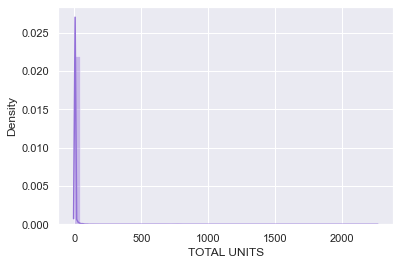

In [45]:
# 3. Visualization
# Kurva Data Total Units
sns.distplot(df_ds['TOTAL UNITS'],
            color='#9370D8')

In [47]:
df_ds_tu = df_ds['TOTAL UNITS'].groupby(df_ds['TOTAL UNITS']).value_counts()
df_ds_tu

TOTAL UNITS  TOTAL UNITS
0            0              19762
1            1              38356
2            2              15914
3            3               5412
4            4               1498
                            ...  
902          902                1
955          955                1
1653         1653               1
1866         1866               2
2261         2261               1
Name: TOTAL UNITS, Length: 192, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

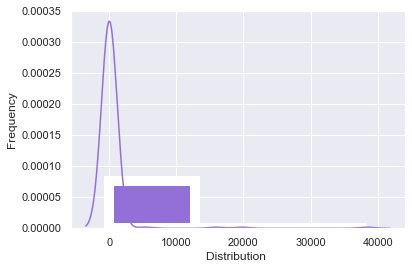

In [48]:
# Plot Data Total Units
ax = sns.distplot(df_ds_tu,
                  bins=3,
                  kde=True,
                  color='#9370D8',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Distribution ', ylabel='Frequency')

> Berdasarkan dari visualisasi probabilition distribution pada kolom Total Units, maka variabel TOTAL UNITS
termasuk kedalam Gamma Distribution dan Positive skew / right-skewed distribution.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BOROUGH', ylabel='Density'>

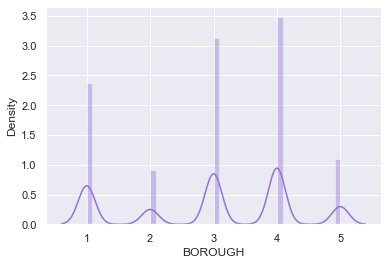

In [49]:
# Kurva Data Borough
sns.distplot(df_ds['BOROUGH'],
            color='#9370D8')

In [50]:
# Pengelompokkan Borough
df_ds_b = df_ds['BOROUGH'].groupby(df_ds['BOROUGH']).value_counts()
df_ds_b

BOROUGH  BOROUGH
1        1          18306
2        2           7049
3        3          24047
4        4          26736
5        5           8410
Name: BOROUGH, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

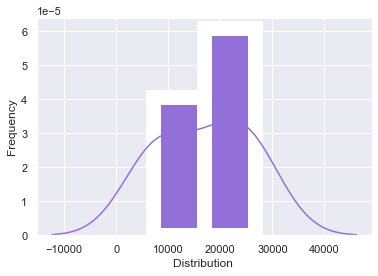

In [51]:
# Plot Data Borough
ax = sns.distplot(df_ds_b,
                  bins=2,
                  kde=True,
                  color='#9370D8',
                  hist_kws={"linewidth": 15,'alpha':1}
                 )
ax.set(xlabel='Distribution ', ylabel='Frequency')

> Berdasarkan dari visualisasi probabilition distribution pada kolom Borough, maka variabel BOROUGH
termasuk kedalam distribusi Uniform dan Normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOT', ylabel='Density'>

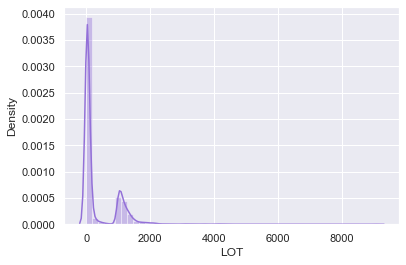

In [52]:
# Kurva Data LOT
sns.distplot(df_ds['LOT'],
            color='#9370D8')

In [53]:
# Pengelompokkan Lot
df_ds_l = df_ds['LOT'].groupby(df_ds['LOT']).value_counts()
df_ds_l

LOT   LOT 
1     1       4125
2     2        742
3     3        811
4     4        685
5     5        805
              ... 
9080  9080       1
9081  9081       1
9085  9085       1
9099  9099       1
9106  9106       1
Name: LOT, Length: 2627, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

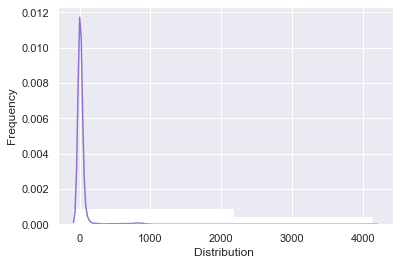

In [54]:
# Plot Data Lot
ax = sns.distplot(df_ds_l,
                  bins=2,
                  kde=True,
                  color='#9370D8',
                  hist_kws={"linewidth": 15,'alpha':1}
                 )
ax.set(xlabel='Distribution ', ylabel='Frequency')

> Berdasarkan dari visualisasi probabilition distribution pada kolom LOT, maka variabel LOT
termasuk kedalam Gamma distribution dan Eksponensial distribution.

**Conclussion**

Dari beberapa kolom atau variabel yang sudah dijabarkan mengenai probability distribution
ditemukan bahwa terdapat variabel yang memiliki distribusi normal yaitu BOROUGH
dan sisanya bukan termasuk kedalam distribusi normal seperti variabel TOTAL UNITS dan LOT

## H. Confidence Intervals

In [56]:
df_ds.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,2,C2,6625000,2017-07-19 00:00:00,16,1,6,6,14889,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,2,C7,530000.0,2016-12-14 00:00:00,21,1,6,5,28592,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,2,C7,530000.0,2016-12-09 00:00:00,21,1,6,5,22192,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,2,C4,3936272,2016-09-23 00:00:00,18,1,6,7,15090,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,2,C2,8000000,2016-11-17 00:00:00,16,1,6,6,35431,15


In [57]:
# Import package yang diperlukan

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

Menggunakan variabel **BUILDING CLASS AT PRESENT_new** dengan tujuan untuk melihat confidence intervalnya.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BUILDING CLASS AT PRESENT_new', ylabel='Density'>

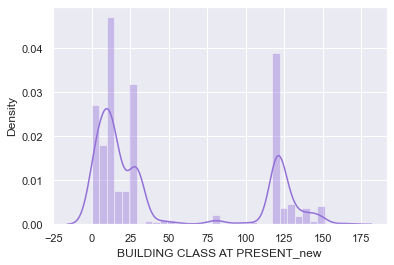

In [58]:
# Kurva data building class at present
sns.distplot(df_ds['BUILDING CLASS AT PRESENT_new'],
            color='#9370D8')

In [59]:
# Memfilter untuk mengelompokkan value dari BUILDING CLASS AT PRESENT_new
df_ds_bcap = df_ds['BUILDING CLASS AT PRESENT_new'].groupby(df_ds['BUILDING CLASS AT PRESENT_new']).value_counts()
df_ds_bcap

BUILDING CLASS AT PRESENT_new  BUILDING CLASS AT PRESENT_new
0                              0                                 738
1                              1                                 469
2                              2                                6753
3                              3                                2821
4                              4                                 389
                                                                ... 
162                            162                                14
163                            163                                 4
164                            164                                 2
165                            165                                 1
166                            166                               150
Name: BUILDING CLASS AT PRESENT_new, Length: 167, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'BUILDING CLASS AT PRESENT_new'), Text(0, 0.5, 'Density')]

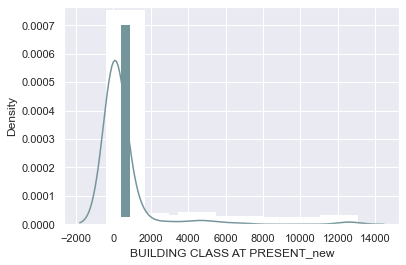

In [60]:
# Plot data BUILDING CLASS AT PRESENT_new
ax = sns.distplot(df_ds_bcap,
                  bins=10,
                  kde=True,
                  color='#74959A',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='BUILDING CLASS AT PRESENT_new', ylabel='Density')

Sulit untuk mengkarakterisasi distribusi yang terbentuk, karena distribusi ini tidak merepresentasikan distribusi normal.

In [61]:
# Calculation Population Mean
pop_mean = df_ds['BUILDING CLASS AT PRESENT_new'].mean()
pop_mean

47.57328381511094

In [62]:
# Calculate Population Standard Deviation
pop_std_dev= df_ds['BUILDING CLASS AT PRESENT_new'].std()
pop_std_dev

51.25239771498638

Akan diambil 300 sampel masing-masing dari 25 nilai acak. Untuk setiap sampel akan dihitung rata-rata sampel yang akan disimpan pada list sample_means.

In [63]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ds['BUILDING CLASS AT PRESENT_new'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


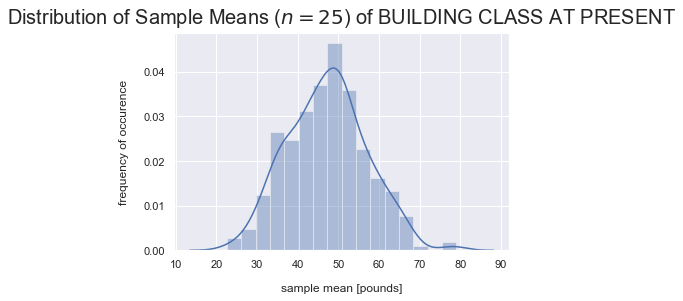

In [64]:
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of BUILDING CLASS AT PRESENT", y=1.015, fontsize=20)
plt.xlabel("sample mean [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Apabila dilihat dari bentuk kurva yang terbentuk, terlihat sudah cukup simestris.

---
Dilakukan perhitungan mean, median, varians, dan standar deviasi dari sample yang terpilih.

In [65]:
# Calculate Median of Sample Means
median_of_sample_means = np.mean(sample_means)
median_of_sample_means

47.269466666666666

In [66]:
# Calculate Mean of Sample Means
mean_of_sample_means = np.median(sample_means)
mean_of_sample_means

47.459999999999994

In [67]:
# Calculate Standard Deviation of Sample Means
var_of_sample_means = np.var(sample_means)
var_of_sample_means

92.96693438222222

In [68]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

9.641936236162435

---
Dilakukan juga perhitungan standard error (SE) dari distribusi sampelnya.

In [69]:
standard_error = pop_std_dev/np.sqrt(n)
standard_error

10.250479542997276

In [70]:
std_dev_of_sample_means

9.641936236162435

---
Nilai z-score two-tailed dengan nilai alpha sebesar 0.5, didapatkan nilai sebesar 1.96 sehingga dapat digunakan untuk mencari nilai kritis dari z-score.

In [71]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [72]:
# The area under the curve between the z-critcal scores is approximately 0.95
1 - (tail * 2)

0.950004209703559

In [73]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

27.369060095725334

In [74]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

67.55093990427466

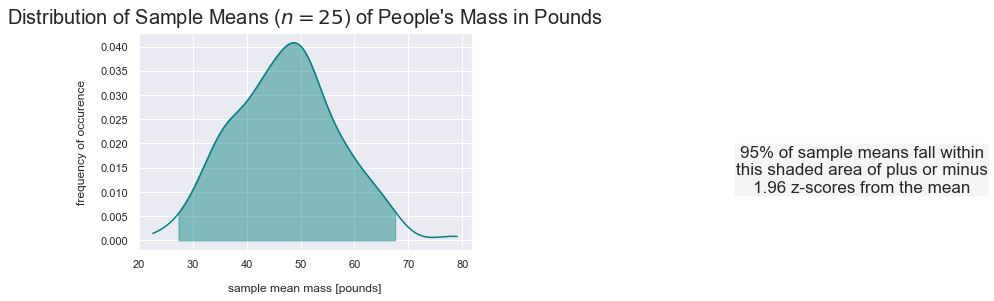

In [75]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

**Conclussion**

Berdasarkan hasil perhitungan di atas, didapatkam nilai 
lower 95% bound sebesar 28.04906009572534 dan upper 95% bound sebesar 68.23093990427466,
yang berarti nilai yang dihasilkan berada diantara 28.04906009572534 < x < 68.23093990427466.

## Hypothesis Testing

In [77]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   BOROUGH                             84548 non-null  int64   
 1   NEIGHBORHOOD                        84548 non-null  category
 2   BUILDING CLASS CATEGORY             84548 non-null  category
 3   TAX CLASS AT PRESENT                84548 non-null  category
 4   BLOCK                               84548 non-null  int64   
 5   LOT                                 84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT           84548 non-null  category
 7   ADDRESS                             84548 non-null  category
 8   RESIDENTIAL UNITS                   84548 non-null  int64   
 9   COMMERCIAL UNITS                    84548 non-null  int64   
 10  TOTAL UNITS                         84548 non-null  int64   
 11  LAND SQUARE FEET            

In [79]:
df_ds.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,2,C2,6625000,2017-07-19 00:00:00,16,1,6,6,14889,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,2,C7,530000.0,2016-12-14 00:00:00,21,1,6,5,28592,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,2,C7,530000.0,2016-12-09 00:00:00,21,1,6,5,22192,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,2,C4,3936272,2016-09-23 00:00:00,18,1,6,7,15090,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,2,C2,8000000,2016-11-17 00:00:00,16,1,6,6,35431,15


Pertanyaan yang digunakan :

apakah ada perbedaan unit yang terjual berdasarkan class category at present bangunan?

- alpha : 0.05
> Hipotesis
- H0 : Terdapat Perbedaan unit yang terjual berdasarkan class category at present bangunan
- H1 : Tidan Terdapat Perbedaan unit yang terjual berdasarkan class category at present bangunan
> Kriteria Uji
- Data memiliki korelasi apabila angka korelasi yang dihasilkan =! 0

In [80]:
df_ds.corr()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
BOROUGH,1.000000,0.417001,-0.277848,-0.023229,-0.005503,-0.023346,0.108303,-0.315163,-0.303971,-0.144981,-0.317936,-0.361609,0.040622,-0.311548
BLOCK,0.417001,1.000000,-0.229118,-0.015628,-0.003517,-0.015888,0.071262,-0.287300,-0.296627,-0.015612,-0.292885,-0.336206,-0.121320,-0.300279
LOT,-0.277848,-0.229118,1.000000,-0.034303,-0.010953,-0.033169,-0.289463,0.296680,0.657077,0.064599,0.450135,0.319449,-0.041106,0.681074
RESIDENTIAL UNITS,-0.023229,-0.015628,-0.034303,1.000000,0.015653,0.888309,0.025380,-0.001074,-0.033562,-0.008771,-0.024709,0.009022,0.003751,-0.035447
COMMERCIAL UNITS,-0.005503,-0.003517,-0.010953,0.015653,1.000000,0.472998,0.006428,0.049586,0.019020,-0.003299,0.030697,0.041650,0.003258,0.019494
TOTAL UNITS,-0.023346,-0.015888,-0.033169,0.888309,0.472998,1.000000,0.024568,0.026429,-0.018224,-0.009389,-0.001565,0.030853,0.004766,-0.019723
YEAR BUILT,0.108303,0.071262,-0.289463,0.025380,0.006428,0.024568,1.000000,-0.187609,-0.359724,-0.034196,-0.258683,-0.152360,-0.034959,-0.425983
TAX CLASS AT TIME OF SALE,-0.315163,-0.287300,0.296680,-0.001074,0.049586,0.026429,-0.187609,1.000000,0.510355,0.036727,0.935198,0.932756,0.009978,0.525264
BUILDING CLASS AT PRESENT_new,-0.303971,-0.296627,0.657077,-0.033562,0.019020,-0.018224,-0.359724,0.510355,1.000000,0.022864,0.644088,0.586269,0.022476,0.973161
NEIGHBORHOOD_new,-0.144981,-0.015612,0.064599,-0.008771,-0.003299,-0.009389,-0.034196,0.036727,0.022864,1.000000,0.034504,0.040401,-0.037837,0.023519


Pada data NYC Rolling sales untuk variabel unit yang terjual dan kategori kelas saat ini pada bangunan memiliki angka korelasi 0.973161 yang berarti unit yang terjual berdasarkan kategori kelas saat ini pada bangunan memiliki korelasi yang paling besar yaitu sebesar 0.973161. Akan dilihat melalui scatter plot terlebih dahulu.

<AxesSubplot:xlabel='BUILDING CLASS AT PRESENT_new', ylabel='BUILDING CLASS AT TIME OF SALE_new'>

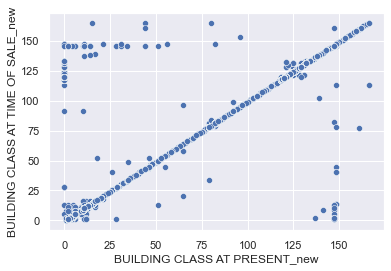

In [81]:
sns.scatterplot(x=df_ds["BUILDING CLASS AT PRESENT_new"], y=df_ds["BUILDING CLASS AT TIME OF SALE_new"], 
data=df_ds)

Dari scatter plot yang terbentuk, dapat dilihat bahwa penyebaran data yang dihasikan cuku terlihat liniear yang berarti data BUILDING CLASS AT PRESENT_new dan BUILDING CLASS AT TIME OF SALE_new berkorelasi poitif.

**Akan dilakukan analisis korelasi menggunakan Rank Spearmann**
> digunakan library scipy.

**Asumsi :**
- Data berdistribusi Normal, iid

- alpha : 0.05

**Hipotesis**
- H0 : BUILDING CLASS AT PRESENT_new dan BUILDING CLASS AT TIME OF SALE_new independen
- H1 : BUILDING CLASS AT PRESENT_new dan BUILDING CLASS AT TIME OF SALE_new dependen

**Kriteria Uji**
- Tolak H0 apabila p-value < alpha

In [82]:
from scipy.stats import spearmanr

In [84]:
stat, p = spearmanr(df_ds["BUILDING CLASS AT PRESENT_new"], df_ds["BUILDING CLASS AT TIME OF SALE_new"])

In [85]:
stat, p

(0.960554847768511, 0.0)

In [86]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.961, p=0.000
Probably dependent


**Conclussion**

berdasarkan hasil perhitungan di atas, didapatkan nilai p-value sebesar 0.00 < alpha = 0.05 yang berarti H0 di tolak atau BUILDING CLASS AT PRESENT_new dan BUILDING CLASS AT TIME OF SALE_new dependen (saling berhubungan).